# Описание проекта

Мы аналитики компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей.
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.
3. Стоимость услуг сверх тарифного пакета:


- минута разговора: 3 рубля;
- сообщение: 3 рубля;
- 1 Гб интернет-трафика: 200 рублей.

### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей.
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика.
3. Стоимость услуг сверх тарифного пакета:


- минута разговора: 1 рубль;
- сообщение: 1 рубль;
- 1 Гб интернет-трафика: 150 рублей.

## Открываем файлы с данными и изучаем общую информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st


calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Таблица `calls.csv`:

In [2]:
display (calls.head())
print ('=' * 50)
print ()
display (calls.info())
print ('=' * 50)
print ()
calls.describe() #изучаем общую информацию по звонкам и основные статистические характеристики.

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


**Вывод:**
1. Пропусков не обнаружено. 
2. Необходимо изменить тип данных в столбце `calls['call_date']` с типа `object` на тип `datetime64`.
3. В условии проекта сказано, что звонки всегда округляются до целого числа в большую сторону. Однако в столбце `calls['duration']` мы видим дробные значения. Соответственно, значения нужно округлить до целого в большую сторону и изменить тип данных с `float64` на `int64`.
4. Присутствуют звонки с длительностью "0". По условию задачи `это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять` (я должен показать, что я это заметил и не оставил без внимания).

### Таблица `internet.csv`:

In [3]:
display (internet.head())
print ('=' * 50)
print ()
display (internet.info())
print ('=' * 50)
print ()
internet.describe() #изучаем общую информацию и основные статистические характеристики.

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000



<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


**Вывод:**
1. Пропусков не обнаружено. 
2. Необходимо изменить тип данных в столбце `internet['session_date']` с типа `object` на тип `datetime64`.
3. Нули в столбце `internet['mb_used]` не являются ошибкой. Вероятнее всего, абоненты не пользуются мобильным интернетом.

###  Таблица `messages.csv`:

In [4]:
display (messages.head())
print ('=' * 50)
print ()
display (messages.info())
print ('=' * 50)
print ()
messages.describe() #изучаем общую информацию сообщениям и основные статистические характеристики.

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


**Вывод:**
1. Пропусков не обнаружено. 
2. Необходимо изменить тип данных в столбце `messages['message_date']` с типа `object` на тип `datetime64`.

###  Таблица `tariffs.csv`:

In [5]:
display (tariffs.head())
#print ('=' * 50)
print ()
tariffs.info() # сначала тоже применял describe(), но затем отменил ввиду ненадобности

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод:**
1. Пропусков не обнаружено. 
2. Данные не нуждаются в изменении типов.
3. Ошибки в данных не обнаружены.

### Таблица `users.csv`:

In [6]:
display (users.head())
#print ('=' * 50)
print ()
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод:**
1. В столбце `users['churn_date']` обнаружены пропуски, но поскольку в условии сказано, что `если значение пропущено, то тариф ещё действовал на момент выгрузки данных`, то оставляем их без изменения. 
2. Необходимо изменить тип данных в столбце `users['churn_date']` с типа `object` на тип `datetime64`.
3. Необходимо изменить тип данных в столбце `users['reg_date']` с типа `object` на тип `datetime64`.

## Подготовка данных

В рамках текущего раздела мы приведём данные к нужным типам, а так же исправим обнаруженные ранее ошибки в данных.

### Подготовка данных в в таблице `calls.csv`

Меняем тип данных в столбце `calls['call_date']` с типа `object` на тип `datetime64`:

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')

Для того, чтобы отследить изменения значений, создадим новый столбец `calls['round_duration']`. Присвоим ему значение `calls['duration']`, и методом `ceil` округлим значения в большую сторону. Изменим тип  данных на `int64` методом `astype()`:

In [8]:
calls['round_duration'] = (calls['duration'].apply(np.ceil)).astype('int64')
display(calls.info()) #смотрим, что получилось.
print ('-' * 50)
calls.tail(10) # выводил head(), но было много нулей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              202607 non-null  object        
 1   call_date       202607 non-null  datetime64[ns]
 2   duration        202607 non-null  float64       
 3   user_id         202607 non-null  int64         
 4   round_duration  202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


None

--------------------------------------------------


,id,call_date,duration,user_id,round_duration
202597,1499_210,2018-10-02,8.86,1499,9
202598,1499_211,2018-12-29,4.58,1499,5
202599,1499_212,2018-12-30,1.35,1499,2
202600,1499_213,2018-10-17,10.77,1499,11
202601,1499_214,2018-12-05,2.42,1499,3
202602,1499_215,2018-12-26,0.76,1499,1
202603,1499_216,2018-10-18,18.83,1499,19
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,5
202606,1499_219,2018-12-14,19.62,1499,20


Значения округлены, преведены к нужним типам данных. 

### Подготовка данных в таблице `internet.csv`

Меняем тип данных в столбце `internet['session_date']` с типа `object` на тип `datetime64`:

In [9]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')

~~Для того, чтобы отследить изменения значений, создадим новый столбец `internet['round_mb_used']`. Присвоим ему значение `internet['mb_used']`, и методом `ceil` округлим значения в большую сторону. Изменим тип данных на `int64` методом `astype()`:~~

<font color='blue'><b>Новая версия 2.0 </b></font>

Перевед типа данных в `internet['mb_used']` в целочисленный не требуется. Округлять до целого будем при общем подсчёте.

In [10]:
#internet['round_mb_used'] = (internet['mb_used'].apply(np.ceil)).astype('int64')
display(internet.info()) #смотрим, что получилось.
print ('-' * 50)
internet.head(10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


None

--------------------------------------------------


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


Значения исправлены, ~~округлены~~, преведены к нужним типам данных. 

### Подготовка данных в таблице `messages.csv`

Меняем тип данных в столбце `messages['message_date']` с типа `object` на тип `datetime64`:

In [11]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Значения преведены к нужним типам данных

### Подготовка данных в таблице `users.csv`

Меняем тип данных в столбце `users['churn_date']` и в столбце `users['reg_date']` с типа `object` на тип `datetime64`:

In [12]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Значения преведены к нужним типам данных

## Расчёт для каждого пользователя

### Расчёт количества сделанных звонков и израсходованных минут разговора по месяцам

Для расчёта количества сделанных звонков создадим новую таблицу:

In [13]:
calls['month'] = calls['call_date'].dt.month #добавляем колонку с месяцами в calls: 1-январь, 12-декабрь
func_list = ['sum', 'count'] #создаем список имен функций
calls_month = (
    calls.groupby(['user_id', 'month']).agg({'round_duration': func_list})
               ) #группируем данные по user_id и month и сохраняем их в новую переменную calls_month
calls_month.columns = ['total_minutes', 'total_calls'] #присваеваем колонкам новые имена
display(calls_month.head(20))
calls_month.info()

total_minutes  total_calls
user_id month                            
1000    5                159           22
        6                172           43
        7                340           47
        8                408           52
        9                466           58
        10               350           57
        11               338           43
        12               333           46
1001    11               430           59
        12               414           63
1002    6                117           15
        7                214           26
        8                289           42
        9                206           36
        10               212           33
        11               243           32
        12               236           33
1003    8                380           55
        9                961          134
        10               855          108

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   total_minutes  3174 non-null   int64
 1   total_calls    3174 non-null   int64
dtypes: int64(2)
memory usage: 62.9 KB


### Расчёт количества отправленных сообщений по месяцам

Для расчёта количества отправленных сообщений создадим новую таблицу:

In [14]:
messages['month'] = messages['message_date'].dt.month #добавляем колонку с месяцами
messages_month = (
    messages.groupby(['user_id', 'month']).agg({'message_date': 'count'})
                 ) #группируем данные по user_id и month и сохраняем их переменную messages_month
messages_month.columns = ['total_message'] #присваеваем колонке новое имя
display(messages_month.info())
messages_month.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   total_message  2717 non-null   int64
dtypes: int64(1)
memory usage: 32.7 KB


None

total_message
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57

### Расчёт объема израсходованного интернет-трафика по месяцам

Для расчёта израсходованного трафика сообщений создадим новую таблицу:

In [15]:
internet['month'] = internet['session_date'].dt.month #добавляем колонку с месяцами
internet_month = (
    internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
                 ) #сохраняем данные в переменную internet_month
internet_month.columns = ['total_mb_used'] #присваиваем колонке новое имя
display(internet_month.info())
internet_month.head(10)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_mb_used  3203 non-null   float64
dtypes: float64(1)
memory usage: 38.5 KB


None

total_mb_used
user_id month               
1000    5            2253.49
        6           23233.77
        7           14003.64
        8           14055.93
        9           14568.91
        10          14702.49
        11          14756.47
        12           9817.61
1001    11          18429.34
        12          14036.66

### Объединение данных

Для того, чтобы в дальнейшем было удобно работать, объединим вновь посчитанные в одну таблицу, и объединим её с таблицами `users` и `tariffs`:

In [16]:
data = calls_month.join([messages_month, internet_month], how='outer').reset_index()
data.head(20)

,user_id,month,total_minutes,total_calls,total_message,total_mb_used
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91
5,1000,10,350.0,57.0,73.0,14702.49
6,1000,11,338.0,43.0,58.0,14756.47
7,1000,12,333.0,46.0,70.0,9817.61
8,1001,11,430.0,59.0,NaN,18429.34
9,1001,12,414.0,63.0,NaN,14036.66


Соединяем   `data` с таблицей `users`, по `user_id`:

In [17]:
all_data = users.merge(data, on='user_id', how='outer').reset_index(drop=True)
display(all_data.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_minutes,total_calls,total_message,total_mb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,2253.49
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23233.77
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14003.64
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14055.93
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,14568.91


Для того, чтобы `all_data` объеденить  с `tariffs` по `tariff`, необходимо переименовать `tariffs['tariff_name']` в `tariffs['tariff']`:

In [18]:
tariffs.rename(columns={'tariff_name':'tariff'}, inplace = True)
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Теперь ничто не мешает `all_data` объеденить  с `tariffs`:

In [19]:
all_data = all_data.merge(tariffs, on='tariff', how='outer')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             189 non-null    datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   month                  3214 non-null   float64       
 9   total_minutes          3174 non-null   float64       
 10  total_calls            3174 non-null   float64       
 11  total_message          2717 non-null   float64       
 12  total_mb_used          3203 non-null   float64       
 13  mes

Мы видим, что в 5 столбцах `all_data['total_minutes', 'total_calls', 'total_message', 'total_mb_used', 'month']` образовались пропуски и тип данных сменился на `float64`. Видимо, при склеивании таблиц занчение "0" сменилось на "nan". Для того, чтобы исправить эту досадную ошибку, заменим "nan" обратно на "0", а затем изменим тип данных на `int64`

In [20]:
#all_data['total_minutes'] = all_data['total_minutes'].fillna(0)
#all_data['total_calls'] = all_data['total_calls'].fillna(0)
#all_data['total_message'] = all_data['total_message'].fillna(0)
#all_data['total_mb_used'] = all_data['total_mb_used'].fillna(0)
all_data[['total_mb_used', 'total_message', 'total_calls', 'total_minutes', 'month']]\
= all_data[['total_mb_used', 'total_message', 'total_calls', 'total_minutes', 'month']].fillna(0)
all_data.info() #пропусков больше нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             189 non-null    datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   month                  3216 non-null   float64       
 9   total_minutes          3216 non-null   float64       
 10  total_calls            3216 non-null   float64       
 11  total_message          3216 non-null   float64       
 12  total_mb_used          3216 non-null   float64       
 13  mes

In [21]:
#all_data['total_minutes', 'total_calls', 'total_message', 'total_mb_used'] = all_data['total_minutes', 'total_calls', 'total_message', 'total_mb_used'].fillna(0)
#all_data[['total_minutes', 'total_calls', 'total_message', 'total_mb_used']]\
#= data[['total_minutes', 'total_calls', 'total_message', 'total_mb_used']].astype('int64')
#all_data['total_calls'] = data['total_calls'].astype('int64')
#all_data['total_calls'].unique()
all_data['total_minutes'] = (all_data['total_minutes'].apply(np.ceil)).astype('int64')
all_data['total_calls'] = (all_data['total_calls'].apply(np.ceil)).astype('int64')
all_data['total_mb_used'] = (all_data['total_mb_used'].apply(np.ceil)).astype('int64')
all_data['total_message'] = (all_data['total_message'].apply(np.ceil)).astype('int64')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             189 non-null    datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   month                  3216 non-null   float64       
 9   total_minutes          3216 non-null   int64         
 10  total_calls            3216 non-null   int64         
 11  total_message          3216 non-null   int64         
 12  total_mb_used          3216 non-null   int64         
 13  mes

Тип данных изменён

Удалим лишние вновьобразованные нули из `all_data['month']`, а значения приведём к типу `int64`:

In [22]:
all_data = all_data.query('month != 0') #прощайте нолики, я буду скучать
all_data['month'] = all_data['month'].astype('int64')
all_data.info() # БИНГО! Замечание Дмитрия устранено

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   age                    3214 non-null   int64         
 2   churn_date             187 non-null    datetime64[ns]
 3   city                   3214 non-null   object        
 4   first_name             3214 non-null   object        
 5   last_name              3214 non-null   object        
 6   reg_date               3214 non-null   datetime64[ns]
 7   tariff                 3214 non-null   object        
 8   month                  3214 non-null   int64         
 9   total_minutes          3214 non-null   int64         
 10  total_calls            3214 non-null   int64         
 11  total_message          3214 non-null   int64         
 12  total_mb_used          3214 non-null   int64         
 13  mes

### Расчёт помесячной выручки с каждого пользователя 

Для того, чтобы получить расчёт помесячной выручки с каждого пользователя вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика. Далее остаток умножим на значение из тарифного плана, а затем прибавим абонентскую плату, соответствующую тарифному плану. Для этого создадим функцию `revenue`. Она посчитает прибыль с учетом абонентской платы за тариф и перерасхода: по звонкам, сообщениям и интернет трафику. Сложим все это вместе и сохраним в новой колонке.

In [23]:
def revenue(row):
   
    revenue = 0
    revenue_calls  = 0
    revenue_message = 0
    revenue_gb_used = 0
   
    if row['total_minutes'] > row['minutes_included']:
        revenue_calls = (row['total_minutes'] - row['minutes_included']) * row['rub_per_minute']
   
    if row['total_message'] > row['messages_included']:
        revenue_message = (row['total_message'] - row['messages_included']) * row['rub_per_message']
    if row['total_mb_used'] > row['mb_per_month_included']:
        revenue_gb_used = ((np.ceil((row['total_mb_used'] - row['mb_per_month_included'])
                                    / 1024)).astype('int64')) * row['rub_per_gb']
   
   
    revenue = row['rub_monthly_fee'] + (revenue_calls + revenue_message + revenue_gb_used)
    return revenue
all_data['total_revenue'] = all_data.apply(revenue, axis = 1) #создаем новую колонку с общей прибылью в общем датафрейме

Для наглядности помесячную прибыль с каждого пользователя сгруппируем и сохраним в отдельную переменную:

In [24]:
revenue_month = all_data.groupby(['user_id', 'month']).agg({'total_revenue': 'sum'})
revenue_month.head(10)

total_revenue
user_id month               
1000    5               1950
        6               1950
        7               1950
        8               1950
        9               1950
        10              1950
        11              1950
        12              1950
1001    11              1150
        12               550

## Анализ данных

В текущем разделе мы опишем поведение клиентов оператора, исходя из выборки: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем  распределения.

### Расчёт количества минут разговора, сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

#### Расчёт количества минут разговора

Cгруппируем общую таблицу по двум колонкам: `all_data['month']` и `all_data['tariff']`, и сохраняем в переменную `calls_month_tariff`:

In [25]:
calls_month_tariff = all_data.groupby(['month', 'tariff']).agg({'total_minutes': 'sum'})
calls_month_tariff

total_minutes
month tariff               
1     smart            6931
      ultra            3853
2     smart           17324
      ultra            7131
3     smart           30034
      ultra           18117
4     smart           41119
      ultra           25191
5     smart           54618
      ultra           34192
6     smart           64885
      ultra           40295
7     smart           82079
      ultra           49667
8     smart           99045
      ultra           54653
9     smart          111439
      ultra           62036
10    smart          125284
      ultra           68644
11    smart          137544
      ultra           72545
12    smart          161275
      ultra           82400

#### Расчёт количества сообщений

Cгруппируем общую таблицу по двум колонкам: `all_data['month']` и `all_data['tariff']`, и сохраняем в переменную `messages_month_tariff`:

In [26]:
message_month_tariff = all_data.groupby(['month', 'tariff']).agg({'total_message': 'sum'})
message_month_tariff

total_message
month tariff               
1     smart             620
      ultra             304
2     smart            1397
      ultra             527
3     smart            2453
      ultra            1195
4     smart            3443
      ultra            1736
5     smart            4762
      ultra            2536
6     smart            5478
      ultra            3505
7     smart            6784
      ultra            4536
8     smart            7905
      ultra            5183
9     smart            8746
      ultra            6013
10    smart            9927
      ultra            7187
11    smart           10768
      ultra            7476
12    smart           12130
      ultra            8425

#### Расчёт объёма интернет трафика

Cгруппируем общую таблицу по двум колонкам: all_data['month'] и all_data['tariff'], и сохраняем в переменную internet_month_tariff:

In [27]:
internet_month_tariff = all_data.groupby(['month', 'tariff']).agg({'total_mb_used': 'sum'})
internet_month_tariff

total_mb_used
month tariff               
1     smart          289482
      ultra          118272
2     smart          672656
      ultra          282632
3     smart         1163058
      ultra          648835
4     smart         1507817
      ultra          925574
5     smart         2228598
      ultra         1297366
6     smart         2590405
      ultra         1589735
7     smart         3164469
      ultra         1865150
8     smart         3903634
      ultra         2094693
9     smart         4239065
      ultra         2208549
10    smart         4926730
      ultra         2465640
11    smart         5339197
      ultra         2651500
12    smart         6104468
      ultra         3029323

#### Объединение данных

Для наглядности объединяем 3 полученные таблица в одну `total_month_join`:

In [28]:
total_month_join = calls_month_tariff.merge(message_month_tariff, on=['month', 'tariff'], how='outer')
total_month_join = total_month_join.merge(internet_month_tariff, on=['month', 'tariff'], how='outer')
total_month_join

total_minutes  total_message  total_mb_used
month tariff                                             
1     smart            6931            620         289482
      ultra            3853            304         118272
2     smart           17324           1397         672656
      ultra            7131            527         282632
3     smart           30034           2453        1163058
      ultra           18117           1195         648835
4     smart           41119           3443        1507817
      ultra           25191           1736         925574
5     smart           54618           4762        2228598
      ultra           34192           2536        1297366
6     smart           64885           5478        2590405
      ultra           40295           3505        1589735
7     smart           82079           6784        3164469
      ultra           49667           4536        1865150
8     smart           99045           7905        3903634
      ultra           54653           5183        2094693
9     smart          111439           8746        4239065
      ultra           62036           6013        2208549
10    smart          125284           9927        4926730
      ultra           68644           7187        2465640
11    smart          137544          10768        5339197
      ultra           72545           7476        2651500
12    smart          161275          12130        6104468
      ultra           82400           8425        3029323

### Рассчёт среднего, дисперсии и стандартного отклонения

#### Расчёт параметров по количеству минут по каждому тарифу:

In [29]:
print('Среднее по количеству минут:')
display(all_data.groupby('tariff')['total_minutes'].mean())#.astype('int'))
print('-' * 35)
print ()
print('Дисперсия:')
display(all_data.groupby('tariff')['total_minutes'].var(ddof=1))#.astype('int'))
print('-' * 35)
print ()
print('Стандартное отклонение:')
display(all_data.groupby('tariff')['total_minutes'].std())#.astype('int'))

Среднее по количеству минут:


tariff
smart    417.934948
ultra    526.623350
Name: total_minutes, dtype: float64

-----------------------------------

Дисперсия:


tariff
smart     36219.315784
ultra    100873.633397
Name: total_minutes, dtype: float64

-----------------------------------

Стандартное отклонение:


tariff
smart    190.313730
ultra    317.606098
Name: total_minutes, dtype: float64

#### Расчёт параметров по количеству сообщений по каждому тарифу:

In [30]:
print('Среднее по количеству сообщений:')
display (all_data.groupby('tariff')['total_message'].mean())#.astype('int'))
print('-' * 35)
print ()
print('Дисперсия:')
display(all_data.groupby('tariff')['total_message'].var(ddof=1))#.astype('int'))
print('-' * 35)
print ()
print('Стандартное отклонение:')
display(all_data.groupby('tariff')['total_message'].std())#.astype('int')) #я оставил display, так как без него
# табличка "Стандартное отклонение " съезжает, и получается некрасивый вывод

Среднее по количеству сообщений:


tariff
smart    33.384029
ultra    49.363452
Name: total_message, dtype: float64

-----------------------------------

Дисперсия:


tariff
smart     796.812958
ultra    2285.266143
Name: total_message, dtype: float64

-----------------------------------

Стандартное отклонение:


tariff
smart    28.227876
ultra    47.804457
Name: total_message, dtype: float64

#### Расчёт параметров по объёму трафика по каждому тарифу:

In [31]:
print('Среднее по объёму интернет трафика:')
display(all_data.groupby('tariff')['total_mb_used'].mean())#.astype('int'))
print('-' * 35)
print ()
print('Дисперсия:')
display(all_data.groupby('tariff')['total_mb_used'].var(ddof=1))#.astype('int'))
print('-' * 35)
print ()
print('Стандартное отклонение:')
display(all_data.groupby('tariff')['total_mb_used'].std())#.astype('int'))

Среднее по объёму интернет трафика:


tariff
smart    16208.873486
ultra    19469.308629
Name: total_mb_used, dtype: float64

-----------------------------------

Дисперсия:


tariff
smart    3.446256e+07
ultra    1.017516e+08
Name: total_mb_used, dtype: float64

-----------------------------------

Стандартное отклонение:


tariff
smart     5870.482332
ultra    10087.197726
Name: total_mb_used, dtype: float64

### Поведение клиентов оператора, исходя из выборки

#### Графики

Для оценки поведения клиентов, воспользуемся графиками. Выводы по графикам можно найти в разделе ВЫВОД:

Посмотрим на график средней длительности звонков в месяц

Text(0, 0.5, 'Минуты')

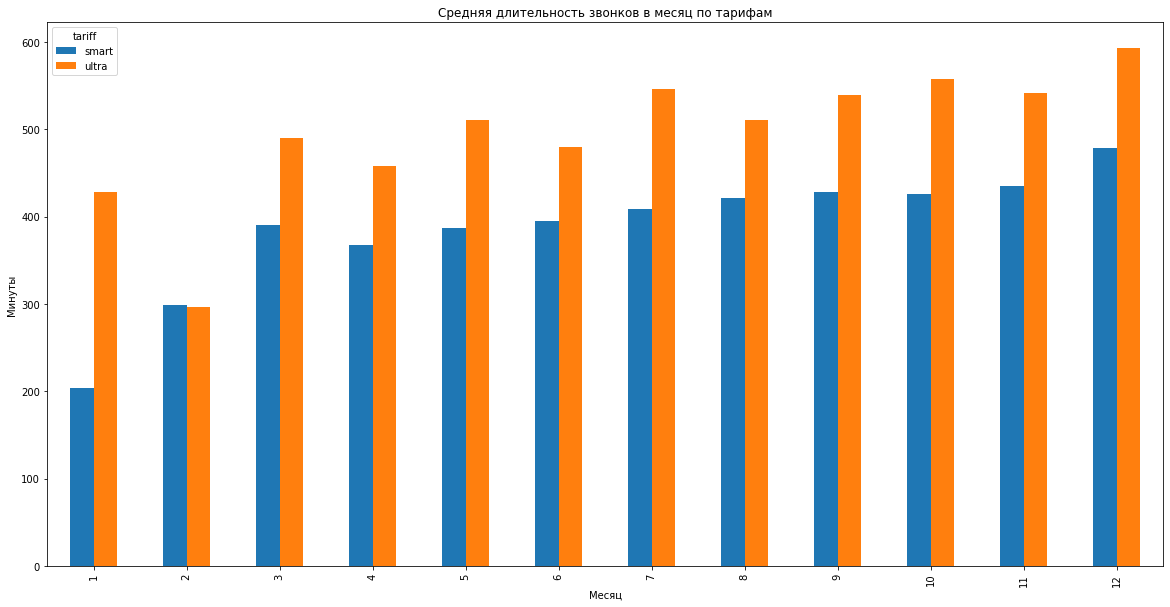

In [32]:
all_data.pivot_table(
    index='tariff', columns='month',
    values='total_minutes', aggfunc='mean').T.plot(kind='bar',
    figsize=(20, 10), title='Средняя длительность звонков в месяц по тарифам')
plt.xlabel('Месяц')
plt.ylabel('Минуты')

Построим график среднего количества звонков в месяц:

Text(0, 0.5, 'Звонки')

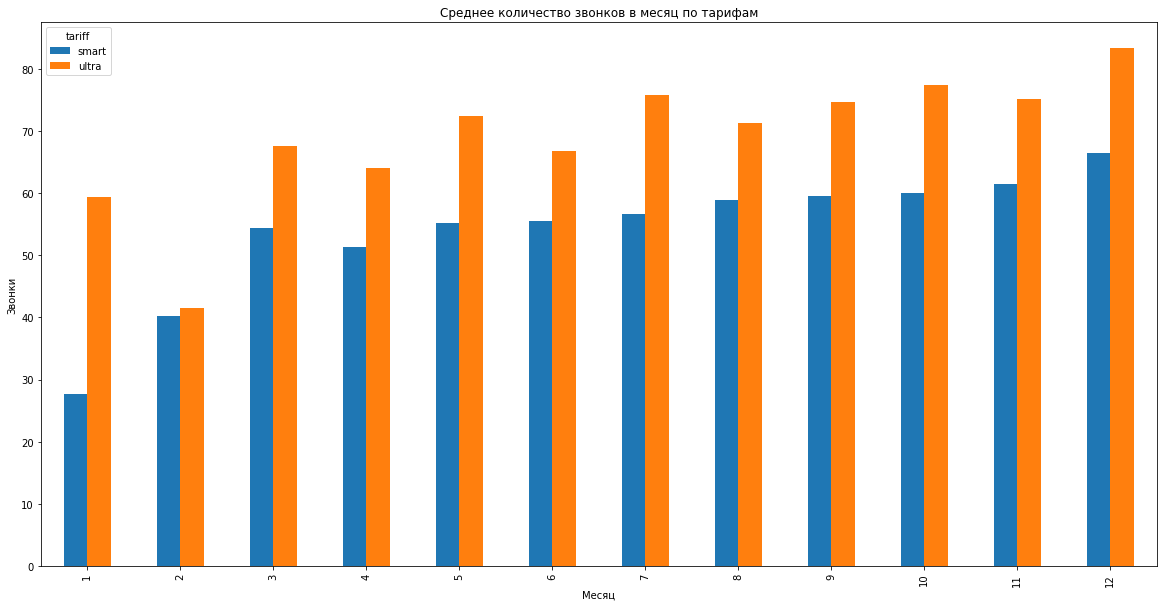

In [33]:
all_data.pivot_table(
    index='tariff', columns='month', values='total_calls', aggfunc='mean').T.plot(kind='bar',
    figsize=(20, 10), title='Среднее количество звонков в месяц по тарифам')
plt.xlabel('Месяц')
plt.ylabel('Звонки')

Построим график среднего количества отправленных сообщений:

Text(0, 0.5, 'Сообщения')

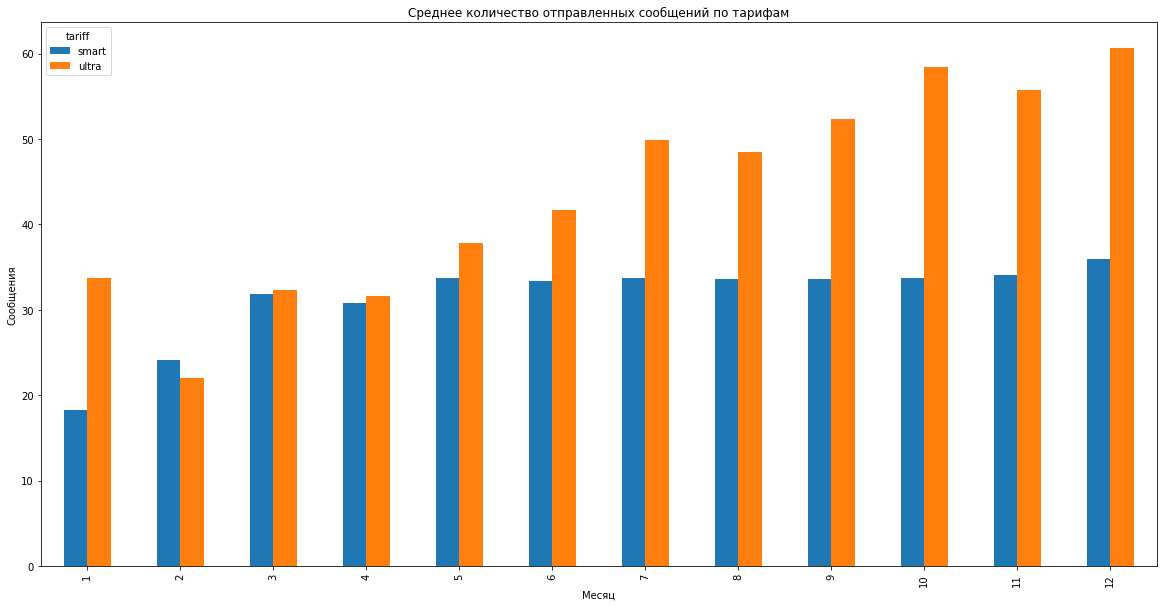

In [34]:
all_data.pivot_table(
    index='tariff', columns='month', values='total_message', aggfunc='mean').T.plot(kind='bar',
    figsize=(20, 10), title='Среднее количество отправленных сообщений по тарифам')
plt.xlabel('Месяц')
plt.ylabel('Сообщения')

Построим график среднего количества израсходованного трафика в месяц:

Text(0, 0.5, 'Мегабайт')

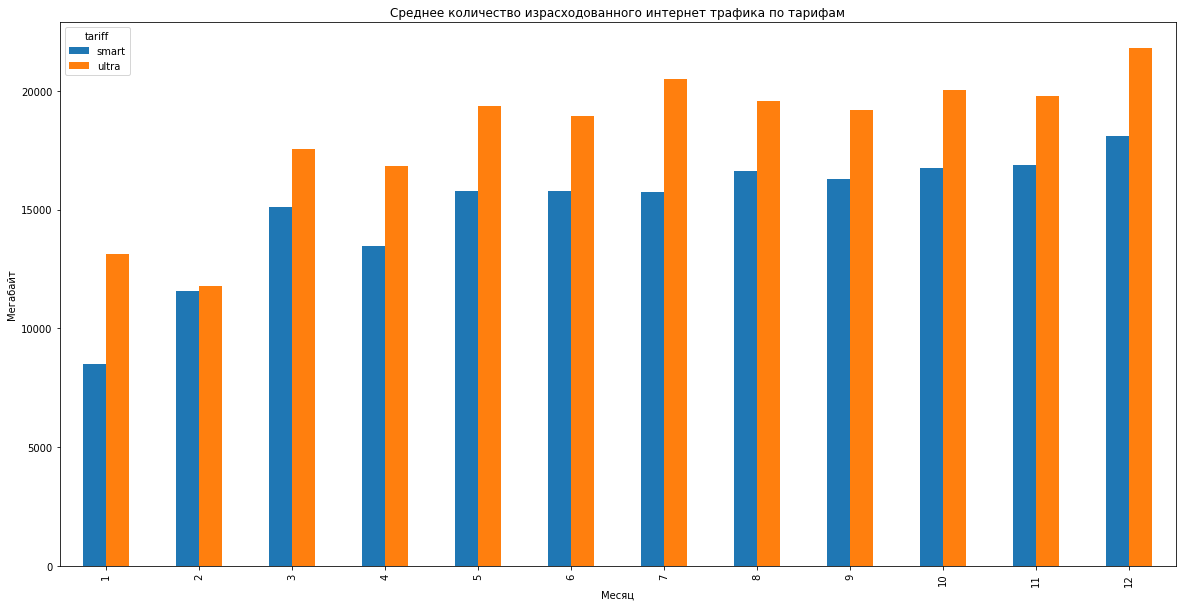

In [35]:
all_data.pivot_table(
    index='tariff', columns='month', values='total_mb_used', aggfunc='mean').T.plot(kind='bar',
    figsize=(20, 10), title='Среднее количество израсходованного интернет трафика по тарифам')
plt.xlabel('Месяц')
plt.ylabel('Мегабайт')

Построим график общей выручки за месяц

Text(0, 0.5, 'Выручка')

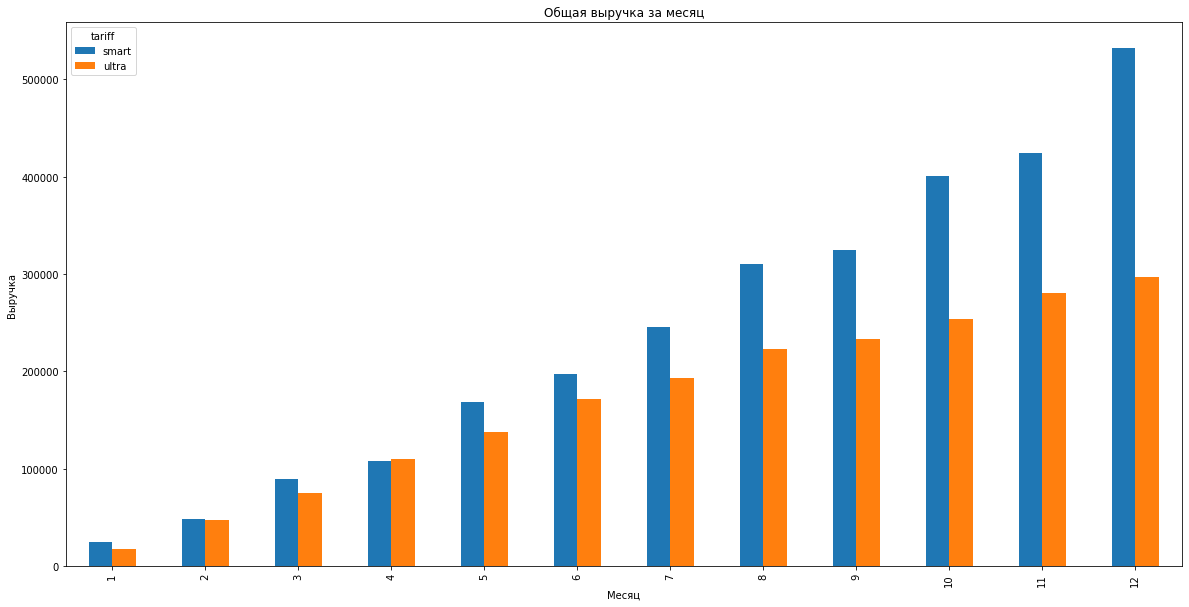

In [36]:
all_data.pivot_table(
    index='tariff', columns='month', values='total_revenue', aggfunc='sum').T.plot(kind='bar',
    figsize=(20, 10), title='Общая выручка за месяц')
plt.xlabel('Месяц')
plt.ylabel('Выручка')

Построим график средней выручки за месяц

Text(0, 0.5, 'Выручка')

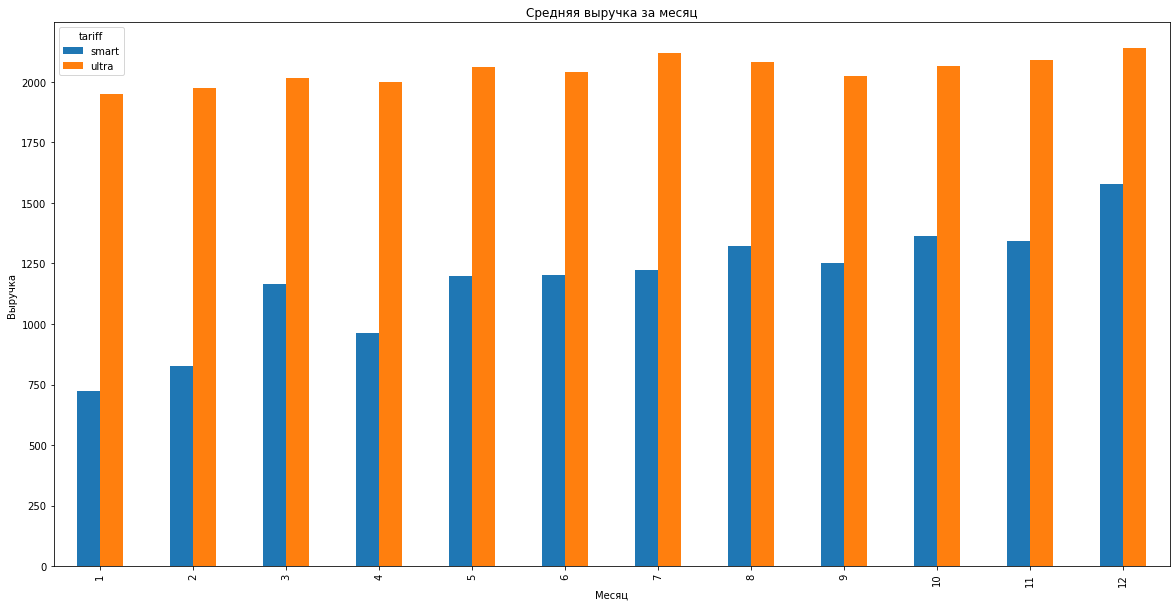

In [37]:
all_data.pivot_table(
    index='tariff', columns='month', values='total_revenue', aggfunc='mean').T.plot(kind='bar',
    figsize=(20, 10), title='Средняя выручка за месяц')
plt.xlabel('Месяц')
plt.ylabel('Выручка')

#### Гистограммы

Строим гистограммы:

Гистограмма по количеству минут:

Text(0.5, 1.0, 'Гистограмма количества минут разговора')

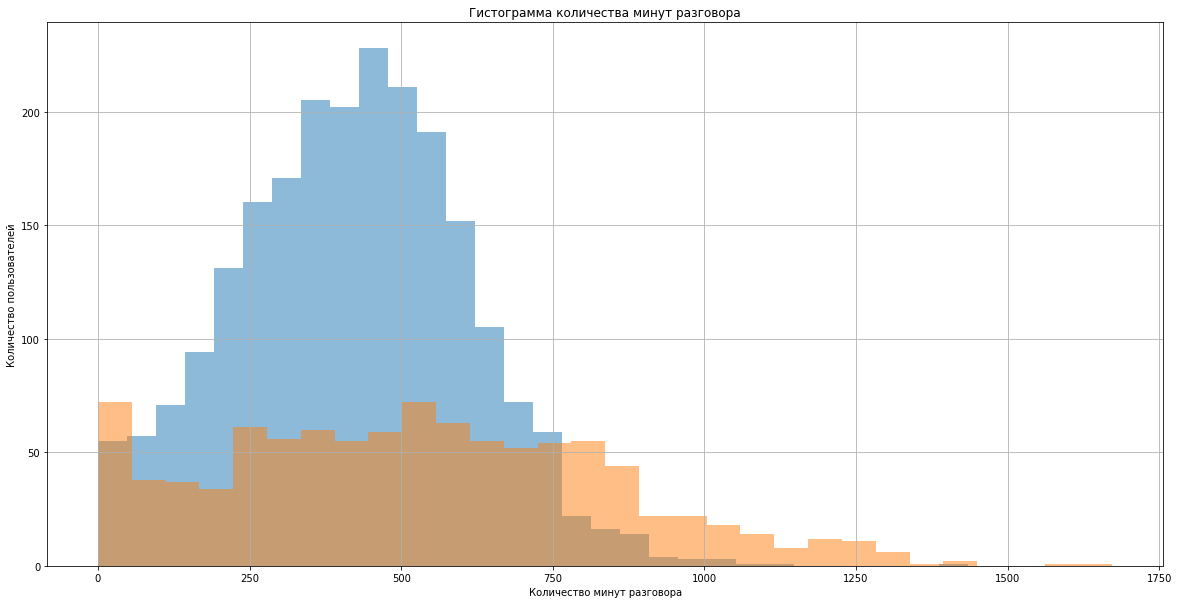

In [38]:
all_data.query('tariff == "smart"')['total_minutes'].hist(bins = 30, alpha = 0.5, figsize=(20,10)) #синяя "Смарт"
all_data.query('tariff == "ultra"')['total_minutes'].hist(bins = 30, alpha = 0.5, figsize=(20,10)) # оранжевая "Ультра"
plt.xlabel('Количество минут разговора')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма количества минут разговора') 

Пользователи "Ультра" говорят больше, это и понятно, ведь в тариф включено в 6 раз больше минут разговора, чем "Смарт". Есть довольно большая группа пользователей "Смарт", которые превышают стандартный пакет, соответственно с таких пользователей берётся дополнительная плата за услугу.

Гистограмма количества звонков:

Text(0.5, 1.0, 'Гистограмма количества количества совершённых звонков')

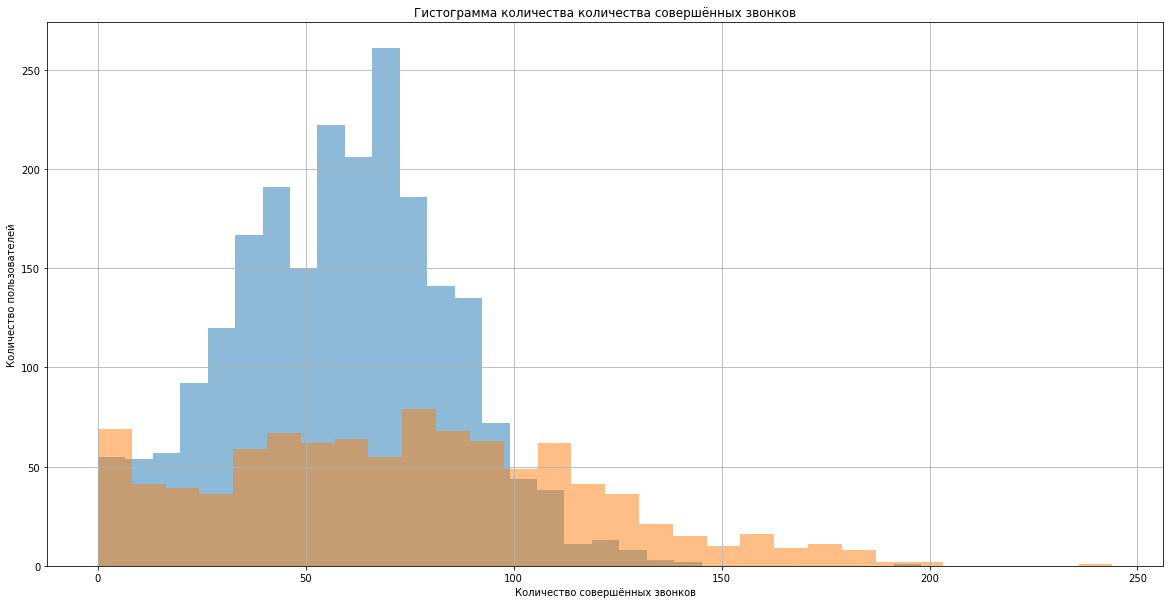

In [39]:
all_data.query('tariff == "smart"')['total_calls'].hist(bins = 30, alpha = 0.5, figsize=(20,10)) #синяя "Смарт"
all_data.query('tariff == "ultra"')['total_calls'].hist(bins = 30, alpha = 0.5, figsize=(20,10)) # оранжевая "Ультра"
plt.xlabel('Количество совершённых звонков')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма количества количества совершённых звонков') 

Гистограмма по количеству сообщений:

Text(0.5, 1.0, 'Гистограмма количества отправленных сообщений')

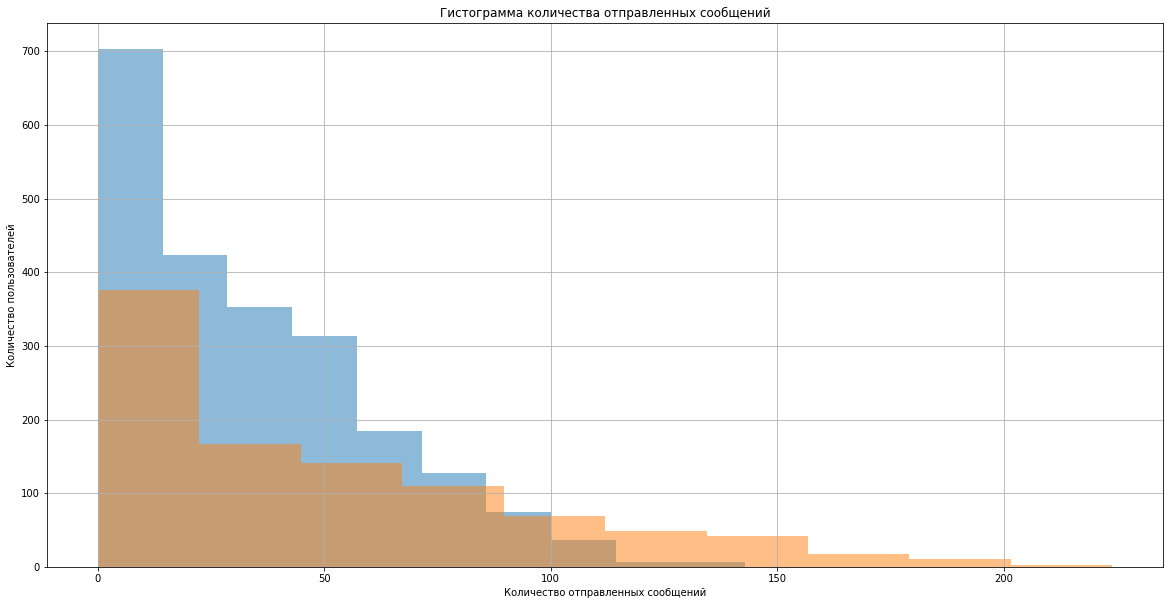

In [40]:
all_data.query('tariff == "smart"')['total_message'].hist(bins = 10, alpha = 0.5, figsize=(20,10)) #синяя "Смарт"
all_data.query('tariff == "ultra"')['total_message'].hist(bins = 10, alpha = 0.5, figsize=(20,10)) # оранжевая "Ультра"
plt.xlabel('Количество отправленных сообщений')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма количества отправленных сообщений') 

Довольно большое количество пользователей обоих тарифов не пользуются этой услугой (зачем, ведь есть интернет и мессенджеры). Однако, существуют абоненты тарифа "Смарт", которые любят отправлять сообщения настолько, что выходят за лимит. Соответственно с них берётся дополнительная плата. Абоненты тарифа "Ультра" сообщений отправляют больше (не удивительно, 1000 штук в пакете), но не на столько, чтобы выйти за рамки пакета. 

Гистограмма по объёму израсходованного трафика: 

Text(0.5, 1.0, 'Гистограмма объёма использованного трафика')

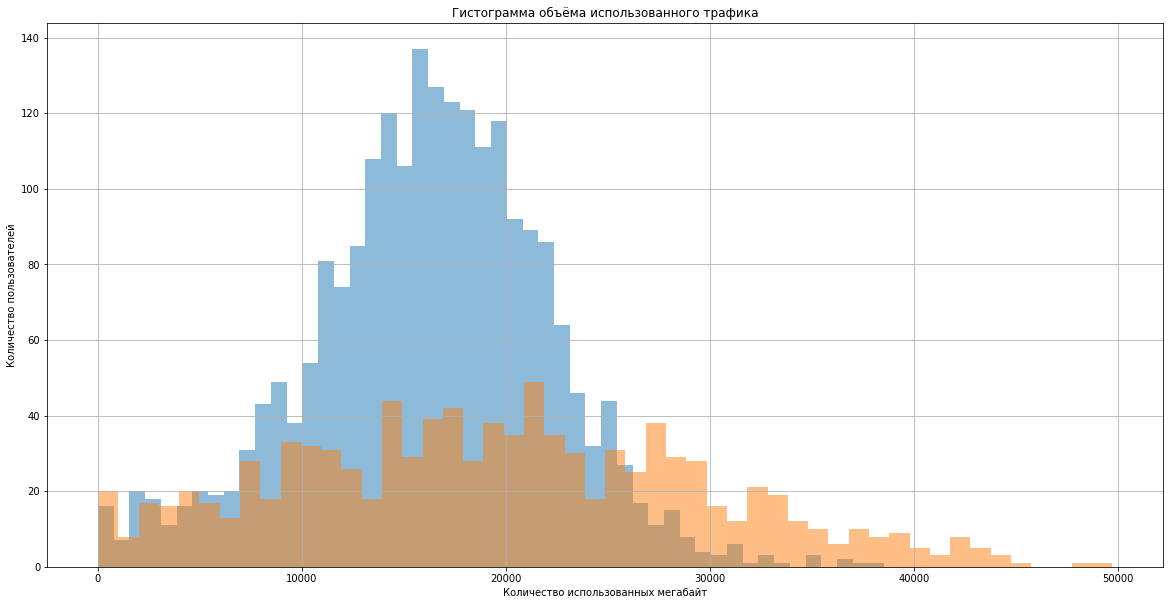

In [41]:
all_data.query('tariff == "smart"')['total_mb_used'].hist(bins = 50, alpha = 0.5, figsize=(20,10)) #синяя
all_data.query('tariff == "ultra"')['total_mb_used'].hist(bins = 50, alpha = 0.5, figsize=(20,10)) # оранжевая
plt.xlabel('Количество использованных мегабайт')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма объёма использованного трафика') 

15 гигабайт интернет трафика в месяц даже в 2018 году было не много, и около половины абонентов тарифа "Смарт" нам это наглядно демонстрируют, не уложившись в тарифный план. Абоненты "Ульта" в своём большенстве в лимит укладываются.  Среди абонентов обоих тарифов есть и те, кто интернетом не пользуется вовсе, либо пользуется мало. Так же присутствуют те, кто переплачивает за интернет.

### Выводы

При имеющемся количестве пользователей тарифов "Смарт" и "Ультра" можно сделать следующие выводы:
1. В среднем пользователи тарифа "Ультра" разговаривают дольше.
2. Абоненты тарифа "Ультра" совершают больше количество звонков.
3. Абоненты тарифа "Ультра" отправляют больше сообщений.
4. Абоненты тарифа "Ультра" пользуются интернетом больше.
5. Абоненты обоих тарифов активно используют интернет-трафик: есть такие, кому тарифного плана не достаточно.
6. Тариф "Смарт" приносит больше прибыли. 

## Проверка гипотез

Поскольку мы проверяем двустороннюю гипотезу о равенстве средних генеральных совокупностей по взятым из них выборкам,  можем использовать `ttest`. Значение критического уровеня статистической значимости `alpha` принимаем равным 0.05

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Формируем нулевую и альтернативную гипотезы. 
Нулевая гипотеза: Средняя выручка пользователей тарифов Ультра и Смарт равны. 
Альтернативная гипотеза: средняя выручка тарифов Ультра и Смарт тарифам различаются.

Для удобства тестирования совершим срез `all_data` по тарифам "Смарт" и "Ультра":

In [42]:
data_smart = all_data.query('tariff == "smart"')
data_ultra = all_data.query('tariff == "ultra"')

alpha = .05
smart_revenue = data_smart['total_revenue']
ultra_revenue = data_ultra['total_revenue']
results = st.ttest_ind(smart_revenue, ultra_revenue)

print (results)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Ttest_indResult(statistic=-28.611056741704818, pvalue=1.4229814360764067e-160)
p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Формируем нулевую и альтернативную гипотезы. Нулевая гипотеза: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [43]:
alpha = .05
moscow_revenue = all_data.query('city == "Москва"')
other_region_revenue = all_data.query('city != "Москва"')
results_2 = st.ttest_ind(moscow_revenue['total_revenue'], other_region_revenue['total_revenue'])
print(results_2)
print('p-значение: ', results_2.pvalue)
if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Ttest_indResult(statistic=0.606816942705698, pvalue=0.5440152911670224)
p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


## Вывод

На основании технического задания, а так же изучения и анализа представленных данных, можно сделать следующие выводы:

1. Какой тариф лучше - некорректный вопрос. Каждый пользователь выбирает тариф под свои определённые задачи. 
2. Средняя выручка тарифов Ультра и Смарт тарифам различаются.
3. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
4. Абоненты тарифа "Ультра" разговаривают дольше.
5. Абоненты тарифа "Ультра" совершают больше количество звонков.
6. Абоненты тарифа "Ультра" отправляют больше сообщений.
7. Абоненты тарифа "Ультра" пользуются интернетом больше.
8. Абоненты обоих тарифов активно используют интернет-трафик: есть такие, кому тарифного плана не достаточно.
9. Тариф "Смарт" приносит больше прибыли, соответственно нужно его развивать.